In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Embedding, Dense, LSTM
from keras.preprocessing.sequence import pad_sequences, TimeseriesGenerator
from keras.models import load_model, Sequential
from google.colab import drive
import csv
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools.eval_measures import rmse 


In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data_dir = '/content/drive/My Drive/data/a8/'

#### Задание 1. Загрузите данные. Изобразите ряд в виде графика. Вычислите основные характеристики временного ряда (сезонность, тренд, автокорреляцию).



In [0]:
time_step = []
sunspots = []

with open(data_dir + 'Sunspots.csv') as file:
  reader = csv.reader(file, delimiter = ',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))
    
series = np.array(sunspots)
time = np.array(time_step)

In [0]:
df = pd.read_csv(data_dir + 'Sunspots.csv')
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")
df.head()

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7


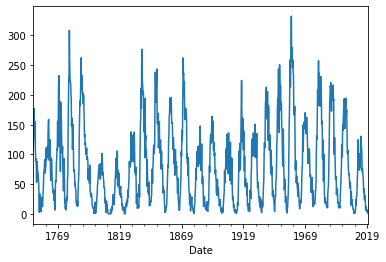

In [0]:
ts = pd.Series(data=df['Monthly Mean Total Sunspot Number'], index=df.index)
ts_month = ts.resample('MS').mean()
ts_quarter = ts.resample('Q').mean()
ts_quarter.plot()
plt.show()

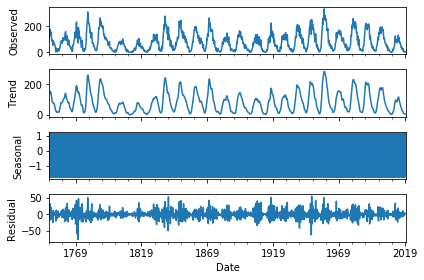

In [0]:
a = seasonal_decompose(df['Monthly Mean Total Sunspot Number'], model = "add")
a.plot();

#### Задание 2. Для прогнозирования разделите временной ряд на обучающую, валидационную и контрольную выборки.


In [0]:
train_data = df[:-300]
test_data = df[300:]

window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

#### Задание 3. Примените модель ARIMA для прогнозирования значений данного временного ряда.


In [0]:
arima_model = SARIMAX(df['Monthly Mean Total Sunspot Number'], trend='n', order=(3,0,10), seasonal_order=(1,1,0,43))
arima_result = arima_model.fit()
arima_pred = arima_result.predict(start=test_data.index[0], end=test_data.index[-1], typ="levels")


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Statespace Model Results                                  
=============================================================================================
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                 3252
Model:               SARIMAX(3, 0, 10)x(1, 1, 0, 43)   Log Likelihood              -15461.157
Date:                               Sat, 07 Mar 2020   AIC                          30952.314
Time:                                       19:48:46   BIC                          31043.420
Sample:                                   01-31-1749   HQIC                         30984.973
                                        - 12-31-2019                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2308      0.141      8.709      0.000       0.954       1.508
ar.L2          0.5193      0.281      1.845      0.065      -0.032       1.071
ar.L3         -0.7544      0.141     -5.369      0.000      -1.030      -0.479
ma.L1         -0.7109      0.141     -5.044      0.000      -0.987      -0.435
ma.L2         -0.7993      0.207     -3.855      0.000      -1.206      -0.393
ma.L3          0.3559      0.051      7.000      0.000       0.256       0.455
ma.L4          0.1424      0.029      4.990      0.000       0.086       0.198
ma.L5          0.0339      0.026      1.313      0.189      -0.017       0.085
ma.L6         -0.0047      0.025     -0.190      0.850      -0.053       0.044
ma.L7         -0.0245      0.023     -1.053      0.292      -0.070       0.021
ma.L8          0.0310      0.024      1.315      0.189      -0.015       0.077
ma.L9          0.0583      0.020      2.932      0.003       0.019       0.097
ma.L10        -0.0597      0.017     -3.562      0.000      -0.092      -0.027
ar.S.L43      -0.5075      0.012    -40.597      0.000      -0.532      -0.483
sigma2       889.9803     17.223     51.675      0.000     856.224     923.736
===================================================================================
Ljung-Box (Q):                       80.51   Jarque-Bera (JB):               358.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.35
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Задание 4. Повторите эксперимент по прогнозированию, реализовав рекуррентную нейронную сеть (с как минимум 2 рекуррентными слоями).


In [0]:
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 12, 200)           161600    
_________________________________________________________________
lstm_16 (LSTM)               (None, 200)               320800    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
Total params: 482,601
Trainable params: 482,601
Non-trainable params: 0
_________________________________________________________________


In [0]:
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
lstm_model.add(LSTM(200, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Epoch 1/10
2640/2640 [==============================] - 98s 37ms/step - loss: 0.0049
Epoch 2/10
2640/2640 [==============================] - 97s 37ms/step - loss: 0.0047
Epoch 3/10
2640/2640 [==============================] - 98s 37ms/step - loss: 0.0047
Epoch 4/10
2640/2640 [==============================] - 97s 37ms/step - loss: 0.0046
Epoch 5/10
2640/2640 [==============================] - 97s 37ms/step - loss: 0.0046
Epoch 6/10
2640/2640 [==============================] - 98s 37ms/step - loss: 0.0045
Epoch 7/10
2640/2640 [==============================] - 102s 39ms/step - loss: 0.0044
Epoch 8/10
2640/2640 [==============================] - 104s 39ms/step - loss: 0.0044
Epoch 9/10
2640/2640 [==============================] - 104s 39ms/step - loss: 0.0044
Epoch 10/10
2640/2640 [==============================] - 100s 38ms/step - loss: 0.0044


In [0]:
lstm_model.fit_generator(generator, epochs=10)

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [0]:
lstm_predictions_scaled

In [0]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[114.9114881 ],
       [104.57782441],
       [ 97.62827124],
       ...,
       [ 18.62165671],
       [ 18.62165968],
       [ 18.62165671]])

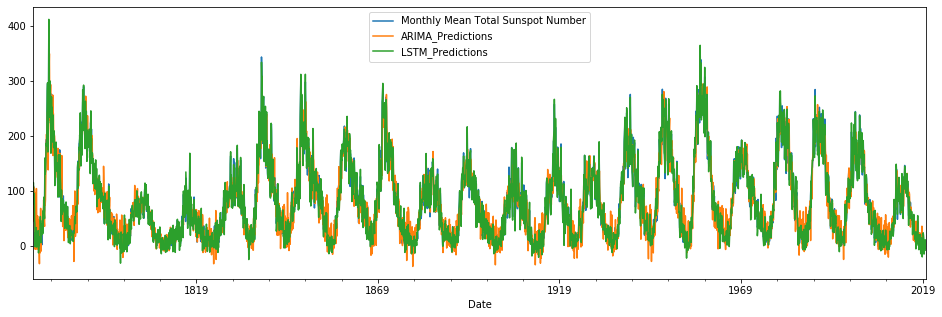

In [0]:
test_data['Monthly Mean Total Sunspot Number'].plot(figsize = (16,5), legend=True)
test_data['ARIMA_Predictions'].plot(legend = True)
test_data['LSTM_Predictions'].plot(legend = True)

#### Задание 5. Сравните качество прогноза моделей.


In [0]:
lstm_rmse_error = rmse(test_data['Monthly Mean Total Sunspot Number'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error ** 2
mean_value = df['Monthly Mean Total Sunspot Number'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 97.91471338329465
RMSE Error: 9.89518637435873
Mean: 82.07069495694965


In [0]:
arima_rmse_error = rmse(test_data['Monthly Mean Total Sunspot Number'], test_data["ARIMA_Predictions"])
arima_mse_error = arima_rmse_error ** 2
mean_value = df['Monthly Mean Total Sunspot Number'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 872.1785569582516
RMSE Error: 29.532669316508652
Mean: 82.07069495694965
